In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
## Read file

data = pd.read_csv("adult.data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data_test = pd.read_csv("adult.test.csv")
data_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data_test = data_test.replace(' ?', np.nan)
data_test.dropna(how ='any', inplace = True)
data_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
#missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
income,0,0.0
native-country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0
capital-gain,0,0.0
sex,0,0.0


In [6]:
total_test = data_test.isnull().sum().sort_values(ascending=False)
percent = (data_test.isnull().sum()/data_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(6)

,Total,Percent
income,0,0.0
native-country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0
capital-gain,0,0.0
sex,0,0.0


In [7]:
print("so luong du lieu huan luyen: ")
print(data.shape)

so luong du lieu huan luyen: 
(32561, 15)


In [8]:
print("so luong du lieu kiem thu: ")
print(data_test.shape)

so luong du lieu kiem thu: 
(15060, 14)


In [9]:
del data['fnlwgt']
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
data_main = data.append(data_test, sort=True)
print(data_main.shape)

(47621, 14)


In [11]:
data_main.dropna()

,age,capital-gain,capital-loss,education,education-num,hours-per-week,income,marital-status,native-country,occupation,race,relationship,sex,workclass
0,39,2174,0,Bachelors,13,40,<=50K,Never-married,United-States,Adm-clerical,White,Not-in-family,Male,State-gov
1,50,0,0,Bachelors,13,13,<=50K,Married-civ-spouse,United-States,Exec-managerial,White,Husband,Male,Self-emp-not-inc
2,38,0,0,HS-grad,9,40,<=50K,Divorced,United-States,Handlers-cleaners,White,Not-in-family,Male,Private
3,53,0,0,11th,7,40,<=50K,Married-civ-spouse,United-States,Handlers-cleaners,Black,Husband,Male,Private
4,28,0,0,Bachelors,13,40,<=50K,Married-civ-spouse,Cuba,Prof-specialty,Black,Wife,Female,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,0,0,Bachelors,13,40,<=50K,Never-married,United-States,Prof-specialty,White,Own-child,Male,Private
16276,39,0,0,Bachelors,13,36,<=50K,Divorced,United-States,Prof-specialty,White,Not-in-family,Female,Private
16278,38,0,0,Bachelors,13,50,<=50K,Married-civ-spouse,United-States,Prof-specialty,White,Husband,Male,Private
16279,44,5455,0,Bachelors,13,40,<=50K,Divorced,United-States,Adm-clerical,Asian-Pac-Islander,Own-child,Male,Private


In [12]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47621 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   capital-gain    47621 non-null  int64 
 2   capital-loss    47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   hours-per-week  47621 non-null  int64 
 6   income          47621 non-null  object
 7   marital-status  47621 non-null  object
 8   native-country  47621 non-null  object
 9   occupation      47621 non-null  object
 10  race            47621 non-null  object
 11  relationship    47621 non-null  object
 12  sex             47621 non-null  object
 13  workclass       47621 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.4+ MB


<AxesSubplot:>

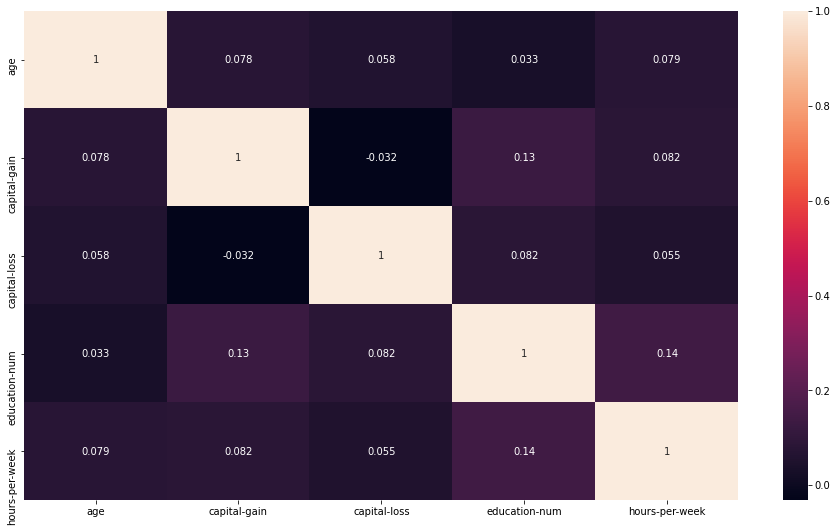

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(data_main.corr(method='pearson'), annot=True)

In [14]:
features = data_main.drop('income', axis=1)
labels = data_main['income']

In [15]:
features.select_dtypes(exclude=['int64']).columns

Index(['education', 'marital-status', 'native-country', 'occupation', 'race',
       'relationship', 'sex', 'workclass'],
      dtype='object')

In [16]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,age,capital-gain,capital-loss,education-num,hours-per-week,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,sex_ Male,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,2174,0,13,40,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,50,0,0,13,13,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,38,0,0,9,40,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,53,0,0,7,40,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,28,0,0,13,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,0,0,13,40,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16276,39,0,0,13,36,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16278,38,0,0,13,50,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16279,44,5455,0,13,40,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [17]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

In [18]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train decision tree classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.8174580445615441
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88     13155
        >50K       0.64      0.61      0.62      4304

    accuracy                           0.82     17459
   macro avg       0.75      0.75      0.75     17459
weighted avg       0.81      0.82      0.82     17459



In [20]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

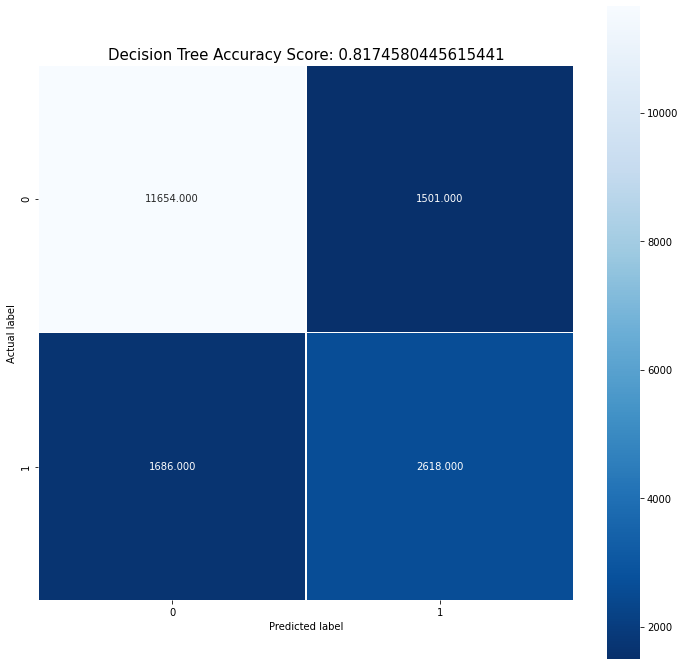

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Decision Tree Accuracy Score: {0}".format(tree_score);
plt.title(title, size = 15);

In [23]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train decision tree classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.8127040494873704
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     13155
        >50K       0.62      0.60      0.61      4304

    accuracy                           0.81     17459
   macro avg       0.75      0.74      0.75     17459
weighted avg       0.81      0.81      0.81     17459



In [25]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

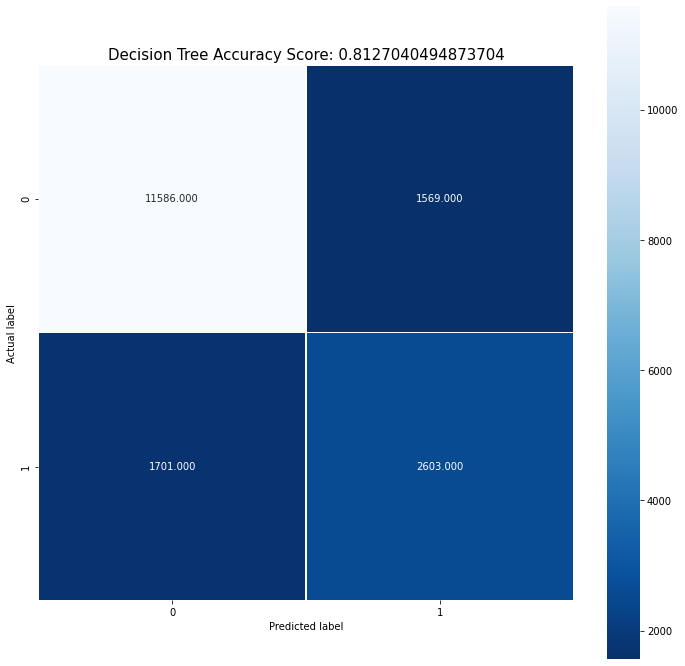

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Decision Tree Accuracy Score: {0}".format(tree_score);
plt.title(title, size = 15);

In [27]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [28]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.7964946445959105
Report:               precision    recall  f1-score   support

       <=50K       0.93      0.79      0.85     13155
        >50K       0.56      0.83      0.67      4304

    accuracy                           0.80     17459
   macro avg       0.75      0.81      0.76     17459
weighted avg       0.84      0.80      0.81     17459



In [37]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

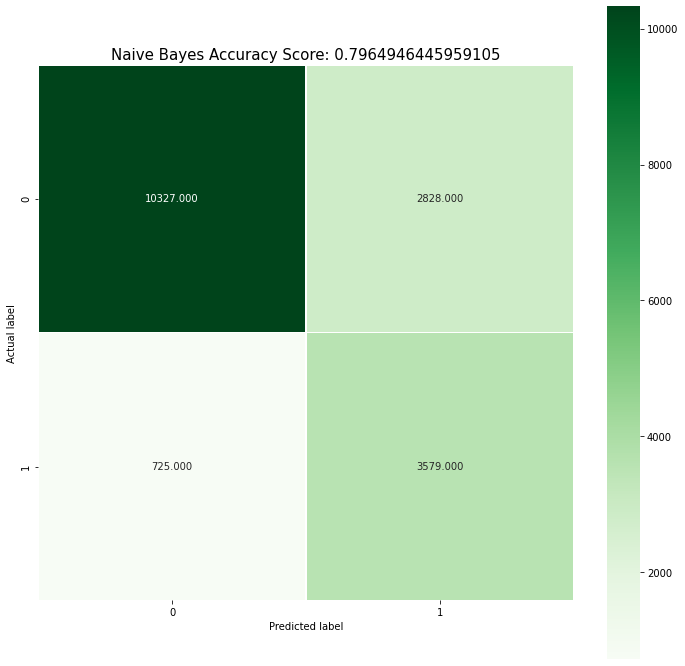

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Greens");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Naive Bayes Accuracy Score: {0}".format(bayes_score);
plt.title(title, size = 15);

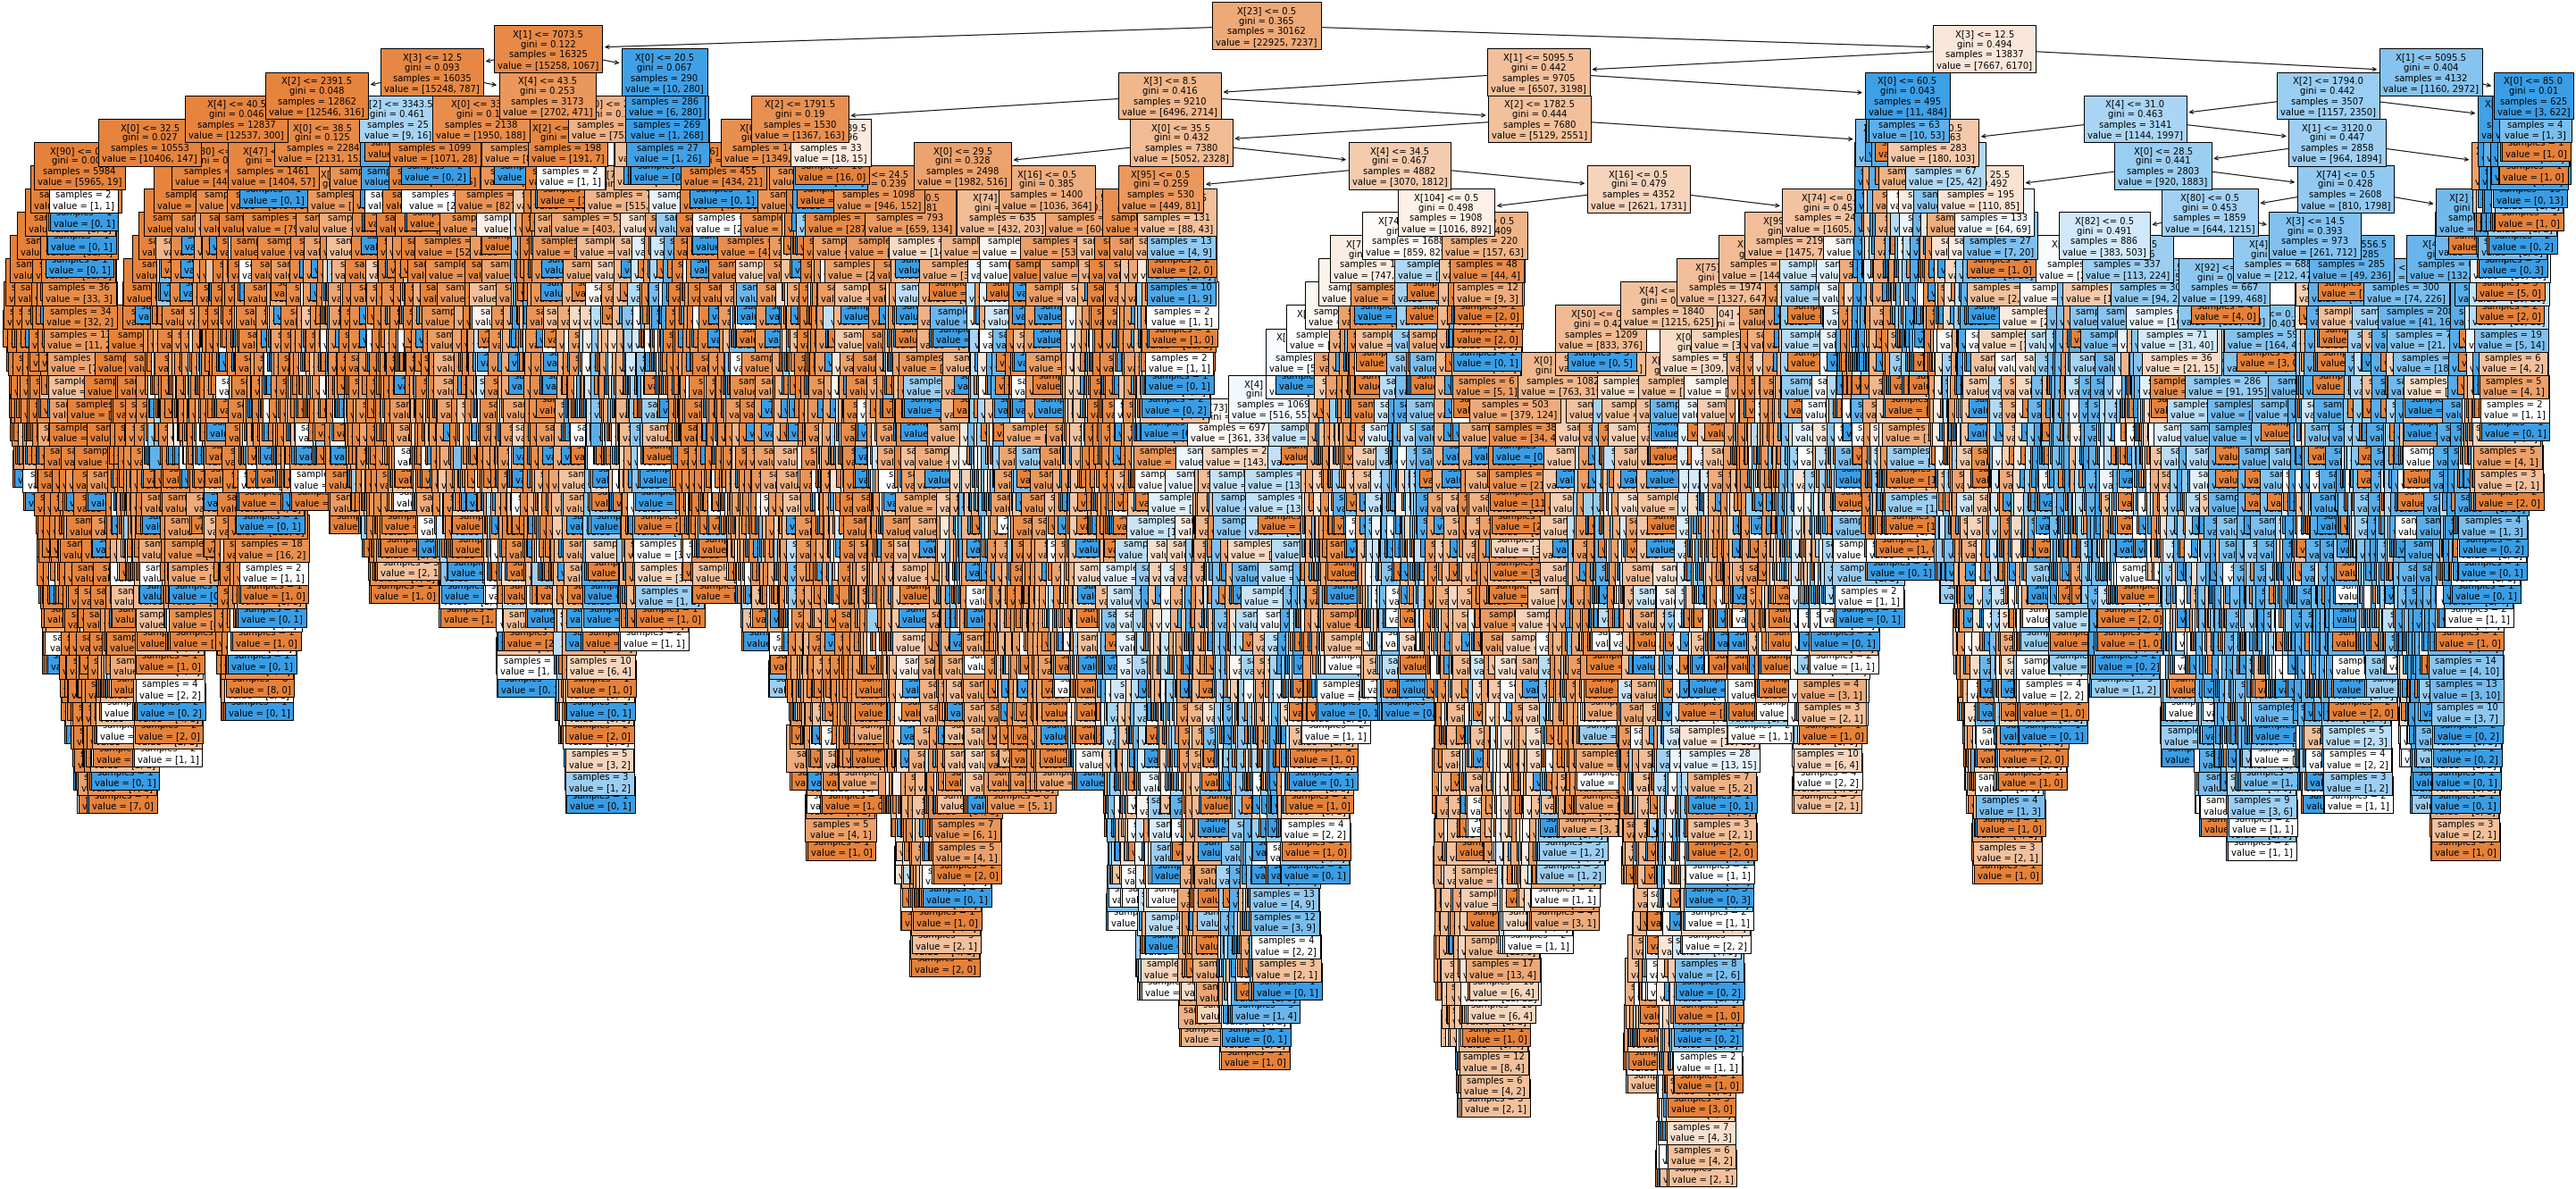

In [39]:
fig, ax = plt.subplots(figsize = (50,24))
tree.plot_tree(clf, filled = True, fontsize = 10)
plt.savefig('decision_tree', dpi=100)

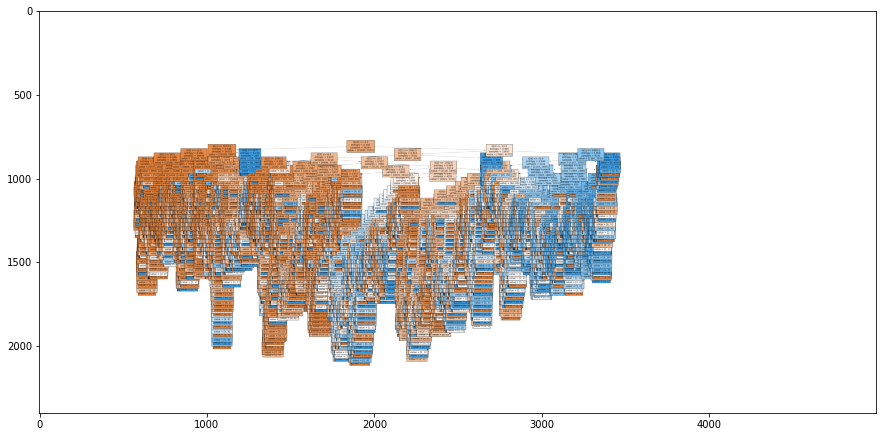

In [36]:
import imageio
pic = imageio.imread('decision_tree.png')
plt.figure(figsize = (15,15))
 
plt.imshow(pic)